In [9]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os

In [10]:
data = pd.read_csv("Scaled_BreastCancer_Data.csv")

In [11]:
data = data.drop(['Unnamed: 0'], axis=1) #dropping unnamed coloumn

#Selecting x and y from features to predict the Target coloumn
X = data.drop(["Target"], axis=1)
y = data.Target.values

In [12]:
from sklearn.model_selection import train_test_split 

#Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
nn.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [14]:
#score for the training set
train = nn.score(x_train, y_train)
print("Training Accuracy Score for Neural Net Model: ", train*100)

#score for the testing set
accuracy = nn.score(x_test, y_test)
print("Testing Accuracy Score for Neural Net Model: ", accuracy*100)

Training Accuracy Score for Neural Net Model:  100.0
Testing Accuracy Score for Neural Net Model:  96.49122807017544


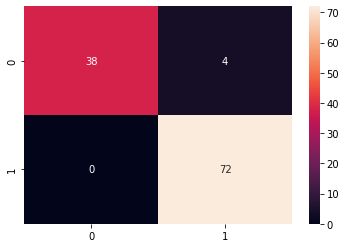

In [15]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation
from sklearn.metrics import confusion_matrix

y_pred_train = nn.predict(x_train)
y_pred_test = nn.predict(x_test)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

In [16]:
n_classes = 2 # Benign or Malignant

y_test_list = y_test.tolist()


from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_test)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

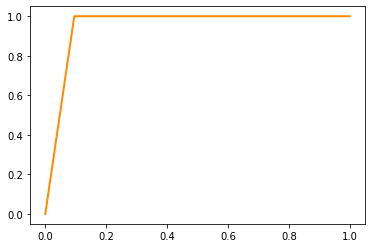

In [17]:
plt.figure()
lw = 2
plt.plot(
    fpr["micro"],
    tpr["micro"],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc["micro"],
)